# Data Collection

## Data 1: Yahoo Finance

In [ ]:
!pip install yfinance

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# Define start and end period
start = dt.datetime(2000,1,1).strftime('%Y-%m-%d')
end = pd.to_datetime('today').strftime('%Y-%m-%d')

# Define the list of sectors, using SPDR ETFs as proxy.
etf = {'SPY': 'SP 500', 'XLC': 'Communication Services',
               'XLY': 'Consumer Discretionary', 'XLP': 'Consumer Staples',
               'XLE': 'Energy', 'XLF': 'Financials', 'XLV':'Health Care',
               'XLI': 'Industrials', 'XLB': 'Materials', 'XLRE': 'Real Estate',
               'XLK': 'Technology', 'XLU': 'Uilities'}
etf_tickers = list(etf.keys())


# Pull data for each ETF
'''
  yfinance data consist of 'Open', 'High', 'Low', 'Close', 'Adj Close' and 'Volume'.
  Only 'Adj Close' and/or 'Volume' is required in this analysis.
'''
data_types = ['Adj Close', 'Close','High', 'Low', 'Open', 'Volume']

data = {}
raw = yf.download(etf_tickers, start=start, end=end)

for data_type in data_types:
    # Extract the specific data type
    df = raw[data_type].copy()
    # Reset index to have 'Date' as a column
    df.reset_index(inplace=True)
    # Store the DataFrame in the dictionary with a key
    data[f'df_{data_type}'] = df


# Seperate Adjust Close as seperate DataFrame
adj_Close = data['df_Adj Close'].copy()

# Rename Columns
adj_Close.rename(columns=etf, inplace=True)

[*********************100%%**********************]  12 of 12 completed


In [ ]:
adj_Close

Ticker,Date,SP 500,Materials,Communication Services,Energy,Financials,Industrials,Technology,Consumer Staples,Real Estate,Uilities,Health Care,Consumer Discretionary
0,2000-01-03,93.290207,14.953670,NaN,14.077826,11.392447,18.527159,41.704247,12.702893,NaN,11.593003,21.058599,22.629530
1,2000-01-04,89.641975,14.809715,NaN,13.812829,10.894422,18.015297,39.588474,12.345183,NaN,11.243300,20.580736,21.948755
2,2000-01-05,89.802307,15.421540,NaN,14.177196,10.808819,17.935007,39.000748,12.563304,NaN,11.527020,20.396107,21.678806
3,2000-01-06,88.359039,15.817421,NaN,14.723750,11.283504,18.175880,37.707794,12.798866,NaN,11.507228,20.461285,21.925278
4,2000-01-07,93.490685,15.808429,NaN,14.881087,11.470266,18.868393,38.366016,13.610239,NaN,11.606190,20.711069,22.958166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,2024-08-05,517.380005,88.029999,82.309998,86.449997,40.840000,120.599998,197.899994,77.699997,40.650002,72.260002,146.830002,171.179993
6186,2024-08-06,522.150024,88.480003,83.279999,86.980003,41.500000,122.050003,200.589996,78.239998,41.549999,72.870003,147.509995,173.070007
6187,2024-08-07,518.659973,87.279999,82.839996,87.330002,41.549999,121.459999,197.339996,78.320000,41.250000,73.279999,146.009995,170.050003
6188,2024-08-08,530.650024,88.629997,84.489998,89.209999,42.220001,124.260002,204.710007,79.029999,41.599998,73.360001,149.240005,173.759995


## Data 2: US Presidential Election Dates

In [4]:
# Define the election dates and their corresponding presidents and parties
election_dates = [
    ('2000-11-07', 'George W. Bush', 'Republican'),
    ('2004-11-02', 'George W. Bush', 'Republican'),
    ('2008-11-04', 'Barack Obama', 'Democratic'),
    ('2012-11-06', 'Barack Obama', 'Democratic'),
    ('2016-11-08', 'Donald Trump', 'Republican'),
    ('2020-11-03', 'Joe Biden', 'Democratic'),
]

# Create a function to label the periods
def label_periods(df, election_dates):
    df['Election'] = 'Non-Election'
    df['President'] = None
    df['Party'] = None

    for i, (election_date, president, party) in enumerate(election_dates):
        # Convert datetime for pandas to read
        election_date = pd.to_datetime(election_date)
        # Define periods for pre-election
        pre_election_start = election_date - pd.DateOffset(months=3)
        pre_election_end = election_date - pd.DateOffset(days=1)
        # Define periods for post-election
        post_election_start = election_date + pd.DateOffset(days=1)
        post_election_end = election_date + pd.DateOffset(months=3)

        # Label periods for pre- and post-elections
        df.loc[(df['Date'] >= pre_election_start) & (df['Date'] <= pre_election_end), 'Election'] = 'Pre-Election'
        df.loc[df['Date'] == election_date, 'Election'] = 'During-Election'
        df.loc[(df['Date'] >= post_election_start) & (df['Date'] <= post_election_end), 'Election'] = 'Post-Election'

        # Label period for president and party
        if i < len(election_dates) - 1:
            next_election_date = pd.to_datetime(election_dates[i+1][0])
            df.loc[(df['Date'] >= election_date) & (df['Date'] < next_election_date), 'President'] = president
            df.loc[(df['Date'] >= election_date) & (df['Date'] < next_election_date), 'Party'] = party
        else:
            df.loc[df['Date'] >= election_date, 'President'] = president
            df.loc[df['Date'] >= election_date, 'Party'] = party

    return df

# Apply the function to label the periods in the DataFrame
adj_Close['Date'] = pd.to_datetime(adj_Close['Date'])
adj_Close = label_periods(adj_Close, election_dates)


In [ ]:
adj_Close

Ticker,Date,SP 500,Materials,Communication Services,Energy,Financials,Industrials,Technology,Consumer Staples,Real Estate,Uilities,Health Care,Consumer Discretionary,Election,President,Party
0,2000-01-03,93.290207,14.953670,NaN,14.077826,11.392447,18.527159,41.704247,12.702893,NaN,11.593003,21.058599,22.629530,Non-Election,None,None
1,2000-01-04,89.641975,14.809715,NaN,13.812829,10.894422,18.015297,39.588474,12.345183,NaN,11.243300,20.580736,21.948755,Non-Election,None,None
2,2000-01-05,89.802307,15.421540,NaN,14.177196,10.808819,17.935007,39.000748,12.563304,NaN,11.527020,20.396107,21.678806,Non-Election,None,None
3,2000-01-06,88.359039,15.817421,NaN,14.723750,11.283504,18.175880,37.707794,12.798866,NaN,11.507228,20.461285,21.925278,Non-Election,None,None
4,2000-01-07,93.490685,15.808429,NaN,14.881087,11.470266,18.868393,38.366016,13.610239,NaN,11.606190,20.711069,22.958166,Non-Election,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,2024-08-05,517.380005,88.029999,82.309998,86.449997,40.840000,120.599998,197.899994,77.699997,40.650002,72.260002,146.830002,171.179993,Non-Election,Joe Biden,Democratic
6186,2024-08-06,522.150024,88.480003,83.279999,86.980003,41.500000,122.050003,200.589996,78.239998,41.549999,72.870003,147.509995,173.070007,Non-Election,Joe Biden,Democratic
6187,2024-08-07,518.659973,87.279999,82.839996,87.330002,41.549999,121.459999,197.339996,78.320000,41.250000,73.279999,146.009995,170.050003,Non-Election,Joe Biden,Democratic
6188,2024-08-08,530.650024,88.629997,84.489998,89.209999,42.220001,124.260002,204.710007,79.029999,41.599998,73.360001,149.240005,173.759995,Non-Election,Joe Biden,Democratic


## Data 3: US Economic Data

Reference:
1. https://pyfredapi.readthedocs.io/en/latest/tutorials/series.html
2. https://www.kaggle.com/code/mohamedyosef101/economic-data-analysis-with-fredapi

In [5]:
!pip install fredapi

In [6]:
# Import API key
from fredapi import Fred

# Define API key
fred_api = 'cfef77e5661aa07dfccc569455651d8d'

# Create Fred Object
fred = Fred(api_key=fred_api)

In [7]:
fred_series = {
    'GDP': 'GDP',  # Gross Domestic Product
    'UNRATE': 'UNRATE',  # Unemployment Rate
}

# Create a DataFrame to store FRED data
fred_data = pd.DataFrame()

for key, series in fred_series.items():
  series_data = fred.get_series(series, start, end)
  fred_data[key] = series_data

# Reset index to have 'Date' as a column
fred_data.reset_index(inplace=True)
# fred_data.rename(columns={'index': 'Date'}, inplace=True)
fred_data.rename(columns={'index': 'Date','UNRATE':"Unemployment"}, inplace=True)

# Merge FRED data with stock data on 'Date'
data = pd.merge_asof(adj_Close, fred_data, on='Date', direction='backward')


In [ ]:
data

,Date,SP 500,Materials,Communication Services,Energy,Financials,Industrials,Technology,Consumer Staples,Real Estate,Uilities,Health Care,Consumer Discretionary,Election,President,Party,GDP,Unemployment
0,2000-01-03,93.290215,14.953680,NaN,14.077829,11.392449,18.527159,41.704254,12.702888,NaN,11.593000,21.058599,22.629522,Non-Election,None,None,10002.179,4.0
1,2000-01-04,89.641991,14.809717,NaN,13.812831,10.894417,18.015303,39.588470,12.345187,NaN,11.243299,20.580736,21.948755,Non-Election,None,None,10002.179,4.0
2,2000-01-05,89.802292,15.421541,NaN,14.177199,10.808818,17.935011,39.000740,12.563294,NaN,11.527020,20.396109,21.678797,Non-Election,None,None,10002.179,4.0
3,2000-01-06,88.359047,15.817422,NaN,14.723749,11.283502,18.175892,37.707775,12.798864,NaN,11.507229,20.461271,21.925282,Non-Election,None,None,10002.179,4.0
4,2000-01-07,93.490631,15.808425,NaN,14.881084,11.470265,18.868391,38.366028,13.610244,NaN,11.606200,20.711071,22.958166,Non-Election,None,None,10002.179,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,2024-08-05,517.380005,88.029999,82.309998,86.449997,40.840000,120.599998,197.899994,77.699997,40.650002,72.260002,146.830002,171.179993,Non-Election,Joe Biden,Democratic,28629.153,3.9
6186,2024-08-06,522.150024,88.480003,83.279999,86.980003,41.500000,122.050003,200.589996,78.239998,41.549999,72.870003,147.509995,173.070007,Non-Election,Joe Biden,Democratic,28629.153,3.9
6187,2024-08-07,518.659973,87.279999,82.839996,87.330002,41.549999,121.459999,197.339996,78.320000,41.250000,73.279999,146.009995,170.050003,Non-Election,Joe Biden,Democratic,28629.153,3.9
6188,2024-08-08,530.650024,88.629997,84.489998,89.209999,42.220001,124.260002,204.710007,79.029999,41.599998,73.360001,149.240005,173.759995,Non-Election,Joe Biden,Democratic,28629.153,3.9


In [8]:
# Download data into csc
data.to_csv('data.csv')

# Data Analysis

## Data Preparation

### Load library

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
import seaborn as sns
from IPython.display import display
from plotly.subplots import make_subplots


raw = pd.read_csv('data.csv').set_index('Date')
raw.index = pd.to_datetime(raw.index)
if 'Unnamed: 0' in raw.columns: raw.drop(columns='Unnamed: 0', inplace=True)
raw.head()

,SP 500,Materials,Communication Services,Energy,Financials,Industrials,Technology,Consumer Staples,Real Estate,Uilities,Health Care,Consumer Discretionary,Election,President,Party,GDP,Unemployment
Date,,,,,,,,,,,,,,,,,
2000-01-03,93.290176,14.953669,NaN,14.077833,11.392447,18.527159,41.704254,12.702890,NaN,11.593005,21.058596,22.629528,Non-Election,NaN,NaN,10002.179,4.0
2000-01-04,89.641953,14.809725,NaN,13.812834,10.894412,18.015308,39.588470,12.345193,NaN,11.243301,20.580734,21.948750,Non-Election,NaN,NaN,10002.179,4.0
2000-01-05,89.802307,15.421537,NaN,14.177193,10.808815,17.935013,39.000755,12.563298,NaN,11.527020,20.396107,21.678802,Non-Election,NaN,NaN,10002.179,4.0
2000-01-06,88.359016,15.817427,NaN,14.723748,11.283507,18.175879,37.707775,12.798867,NaN,11.507226,20.461271,21.925282,Non-Election,NaN,NaN,10002.179,4.0
2000-01-07,93.490601,15.808430,NaN,14.881094,11.470267,18.868391,38.366024,13.610242,NaN,11.606200,20.711063,22.958172,Non-Election,NaN,NaN,10002.179,4.0


### Functions library

In [10]:
# Create function to filter period and sectors
def filter_data(data, selected_years=None, selected_sectors=None):
    """
      Filters the data by the specified years and sectors.

      Parameters:
      - data: The DataFrame containing the data.
      - selected_years: A list of years to filter by (e.g., [2020, 2021]). If None, no year filtering is applied.
      - selected_sectors: A list of sectors to filter by (e.g., ['SP 500', 'Technology']). If None, all sectors are returned.

      Returns:
      - filtered_data: A DataFrame filtered by the specified years and sectors.
    """

    # If no years are specified, select all years
    if selected_years is not None:
        filtered_data = data[data.index.year.isin(selected_years)] # filter selected years
        #filtered_data = data[data['Date'].year.isin(selected_years)] # filter selected years
    else:
        filtered_data = data

    # If no sectors are specified, select all sectors
    if selected_sectors is not None:
        filtered_data = filtered_data[selected_sectors]
    else:
        # # Adjust this to exclude non-sector columns
        sectors = list(data.columns)[:-5]
        filtered_data = filtered_data[sectors]

    return filtered_data


# Create a function to interactive line chart
def filter_data_and_line_plot(data, selected_years=None, selected_sectors=None, normalized=None, Edata=None):
    """
    Filters the data based on the provided years and sectors, and then plots the filtered data.

    Parameters:
    - data: The DataFrame containing the data.
    - selected_years: A list of years to filter by (e.g., [2020, 2021]). If None, no year filtering is applied.
    - selected_sectors: A list of sectors to filter by (e.g., ['SP 500', 'Technology']). If None, all sectors are plotted.
    - normalized: If True, normalize the data to start at the same level.

    Returns:
    - fig: A Plotly Figure object.
    """

    # Filter the data
    filtered_data = filter_data(data, selected_years, selected_sectors)

    # Normalize the data to start at the same level
    if normalized is True:
      filtered_data = filtered_data.div(filtered_data.iloc[0]).mul(100)

    # Create the figure
    fig = go.Figure()

    # Add a trace for each selected sector
    for sector in filtered_data.columns:
        fig.add_trace(go.Scatter(x=filtered_data.index, y=filtered_data[sector], mode='lines', name=sector))

    # Add secondary y-axis for GDP and Unemployment if Edata is toggled
    if Edata is not None:
        if 'GDP' in filtered_data.columns:
            fig.add_trace(go.Scatter(x=filtered_data.index, y=filtered_data['GDP'], mode='lines', name='GDP', yaxis='y1'))
        if 'Unemployment' in filtered_data.columns:
            fig.add_trace(go.Scatter(x=filtered_data.index, y=filtered_data['Unemployment'], mode='lines', name='Unemployment', yaxis='y1'))

    # Update layout with dropdowns
    fig.update_layout(
        title="Filtered Data Plot",
        xaxis_title="Date",
        yaxis_title="Value",
        legend_title="Sector",
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label='All Sectors',
                         method='update',
                         args=[{'visible': [True] * len(data.columns)},
                               {'title': 'All Sectors'}])
                ] + [
                    dict(label=sector,
                         method='update',
                         args=[{'visible': [col == sector for col in data.columns]},
                               {'title': f'{sector}'}])
                    for sector in data.columns
                ])
            )
        ]
    )

    return fig


## Descriptive Statistics

In [21]:
# Filter by periods
selected_years = [2020, 2021]

# Filtering by sectors
sectors = list(raw.columns[:-5])
selected_sectors = ['SP 500','Consumer Discretionary','Health Care','Industrials', 'Consumer Staples','Uilities']
selected_sectors_w_GDP = ['SP 500','Consumer Discretionary','Health Care','Industrials', 'Consumer Staples','Uilities','GDP']
selected_columns_w_GDP = list(raw.columns)
selected_columns_w_GDP.remove('Election')
selected_columns_w_GDP.remove('President')
selected_columns_w_GDP.remove('Party')


# Data Type info
filtered_data = filter_data(raw, selected_sectors=selected_columns_w_GDP)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6190 entries, 2000-01-03 to 2024-08-09
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SP 500                  6190 non-null   float64
 1   Materials               6190 non-null   float64
 2   Communication Services  1546 non-null   float64
 3   Energy                  6190 non-null   float64
 4   Financials              6190 non-null   float64
 5   Industrials             6190 non-null   float64
 6   Technology              6190 non-null   float64
 7   Consumer Staples        6190 non-null   float64
 8   Real Estate             2224 non-null   float64
 9   Uilities                6190 non-null   float64
 10  Health Care             6190 non-null   float64
 11  Consumer Discretionary  6190 non-null   float64
 12  GDP                     6190 non-null   float64
 13  Unemployment            6190 non-null   float64
dtypes: float64(14)
memory 

In [12]:
filtered_data.describe()

,SP 500,Materials,Communication Services,Energy,Financials,Industrials,Technology,Consumer Staples,Real Estate,Uilities,Health Care,Consumer Discretionary,GDP,Unemployment
count,6190.000000,6190.000000,1546.000000,6190.000000,6190.000000,6190.000000,6190.000000,6190.000000,2224.000000,6190.000000,6190.000000,6190.000000,6190.000000,6190.000000
mean,176.782650,36.718946,60.161847,41.660956,18.408843,44.052766,50.726608,32.665257,31.755319,30.846940,53.074217,65.163512,17136.605886,5.759015
std,123.825439,21.852190,12.974570,19.310697,8.454112,29.388244,50.349290,20.124452,6.429503,18.170842,38.743197,52.190180,4940.795230,2.058013
min,50.856682,10.035085,37.117767,10.946945,3.780496,11.310508,8.711343,10.384473,20.320623,7.087790,15.233971,13.169908,10002.179000,3.400000
25%,85.249374,18.866930,48.415223,27.928356,12.510605,20.504515,17.420919,14.765891,25.676490,16.231790,22.124854,24.574228,13599.160000,4.200000
50%,110.300228,29.476056,57.523226,43.660841,15.968935,29.142863,26.472488,24.341510,31.754959,23.489910,30.016424,37.423527,16207.115000,5.200000
75%,244.472237,49.510874,70.944500,51.215567,22.926528,64.688066,63.592999,45.839864,36.763350,43.854164,76.852598,98.402414,20328.553000,6.500000
max,564.859985,92.618782,87.790001,97.298637,43.849998,128.190002,237.679993,79.260002,47.533115,74.220001,151.160004,206.589035,28629.153000,14.800000


## Sectors Price Interactive Chart

### All Sectors Price Chart

In [13]:
# Plot interactive line chart
fig = filter_data_and_line_plot(raw)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### All Sector Price Chart Normalized

In [ ]:
# Plot interactive line chart (Normalized)
fig = filter_data_and_line_plot(raw, normalized=True)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Calculating growth

In [21]:
# US Sector Growth from 2000 to 9 Aug 2024
ret_2000 = np.log(raw[sectors].iloc[-1]/raw[sectors].iloc[0] - 1
ret_2000.sort_values(ascending=False)

,0
Consumer Discretionary,6.704095
Health Care,6.122028
Industrials,5.707989
Energy,5.351125
Uilities,5.349518
Consumer Staples,5.230863
Materials,4.922290
SP 500,4.713248
Technology,3.930671
Financials,2.721763


In [13]:
# US Sector Growth from to 1 Jan 2015 to Aug 2024
period_2015_2024 = '2015-01-02'
ret_2015_2024 = raw[sectors].loc[period_2015_2024]/raw[sectors].iloc[0] - 1
ret_2015_2024.sort_values(ascending=False)


,0
Energy,2.838396
Uilities,1.994940
Consumer Staples,1.954603
Consumer Discretionary,1.837103
Health Care,1.791378
Materials,1.685147
Industrials,1.556665
SP 500,0.861986
Financials,0.467400
Technology,-0.123246


In [18]:
# US Sector Growth from to 1 Jan 2020 to Aug 2024
period_2020_2024 = '2020-01-02'
ret_2020_2024 = raw[sectors].loc[period_2020_2024]/raw[sectors].iloc[0] - 1
ret_2020_2024.sort_values(ascending=False)

,0
Consumer Discretionary,4.394583
Uilities,3.764129
Health Care,3.515790
Consumer Staples,3.365329
Industrials,3.157736
Materials,2.702866
Energy,2.509070
SP 500,2.249383
Financials,1.492400
Technology,1.147452


### Top sectors since 2020

In [22]:
# Plot interactive line chart (Normalized)
fig = filter_data_and_line_plot(raw, selected_sectors=selected_sectors_w_GDP, normalized=True, Edata=True)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

The sectors above has the highest price growth

## Sectors Correlation Analysis

### Static Correlation Chart

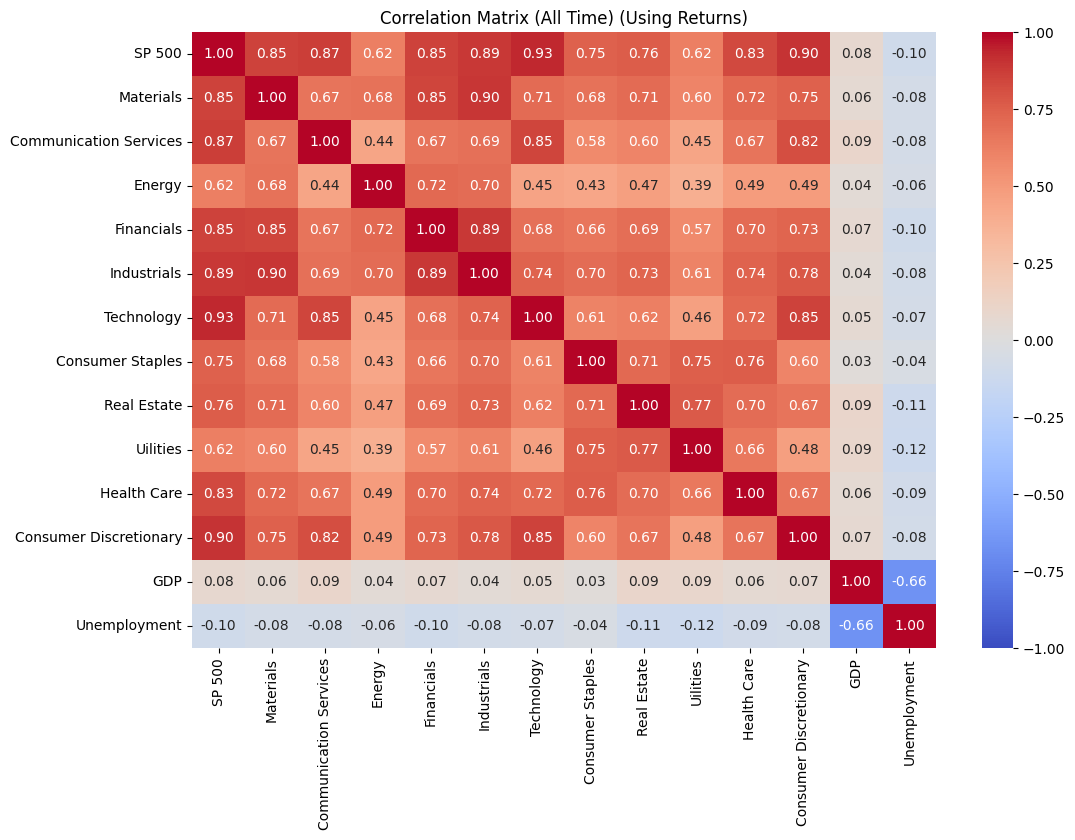

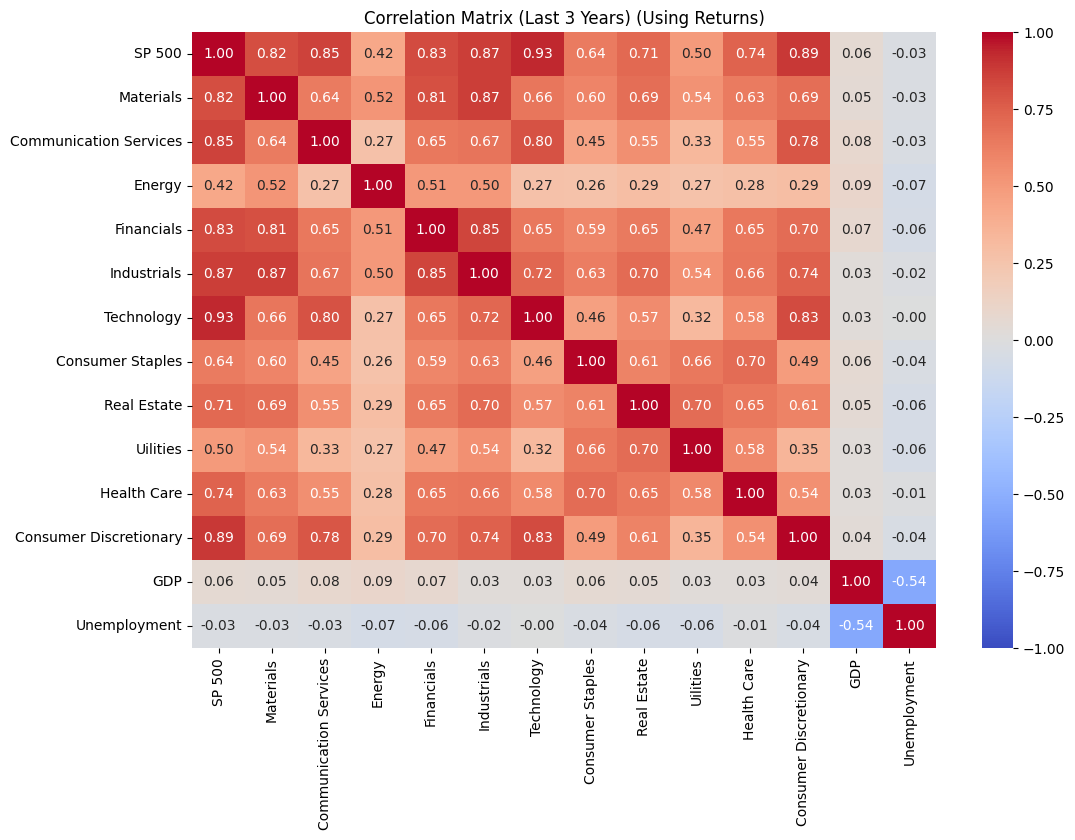

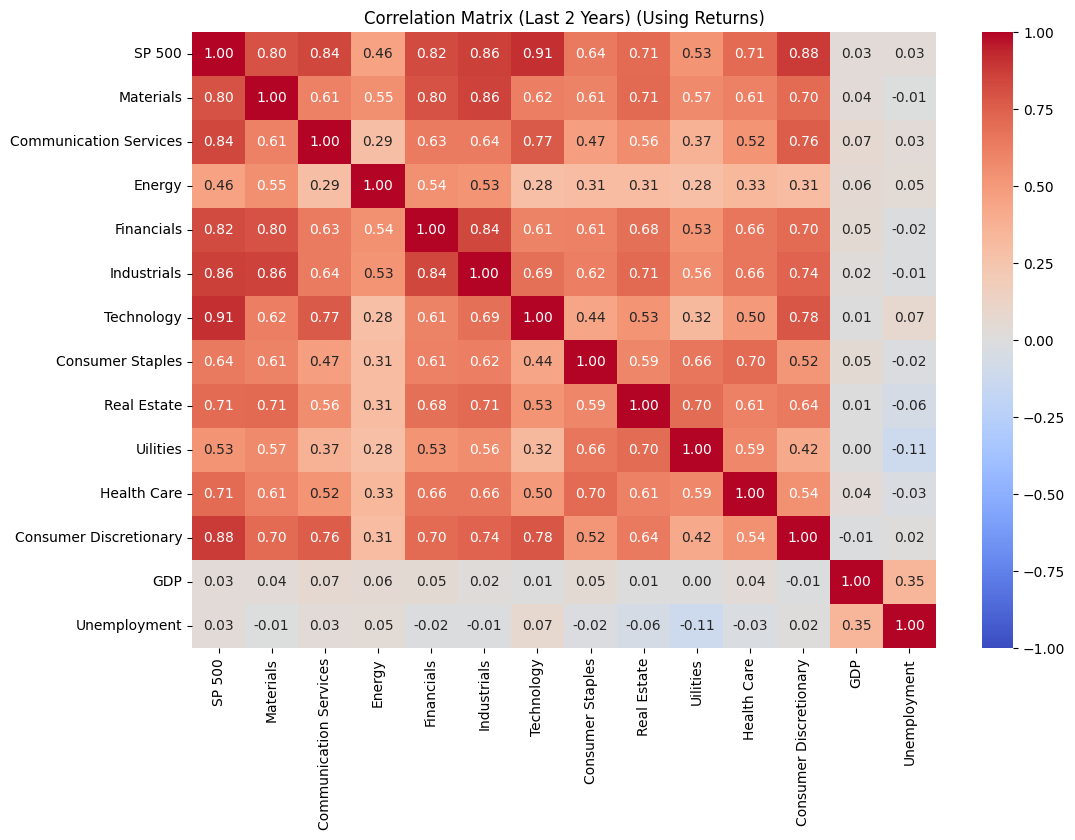

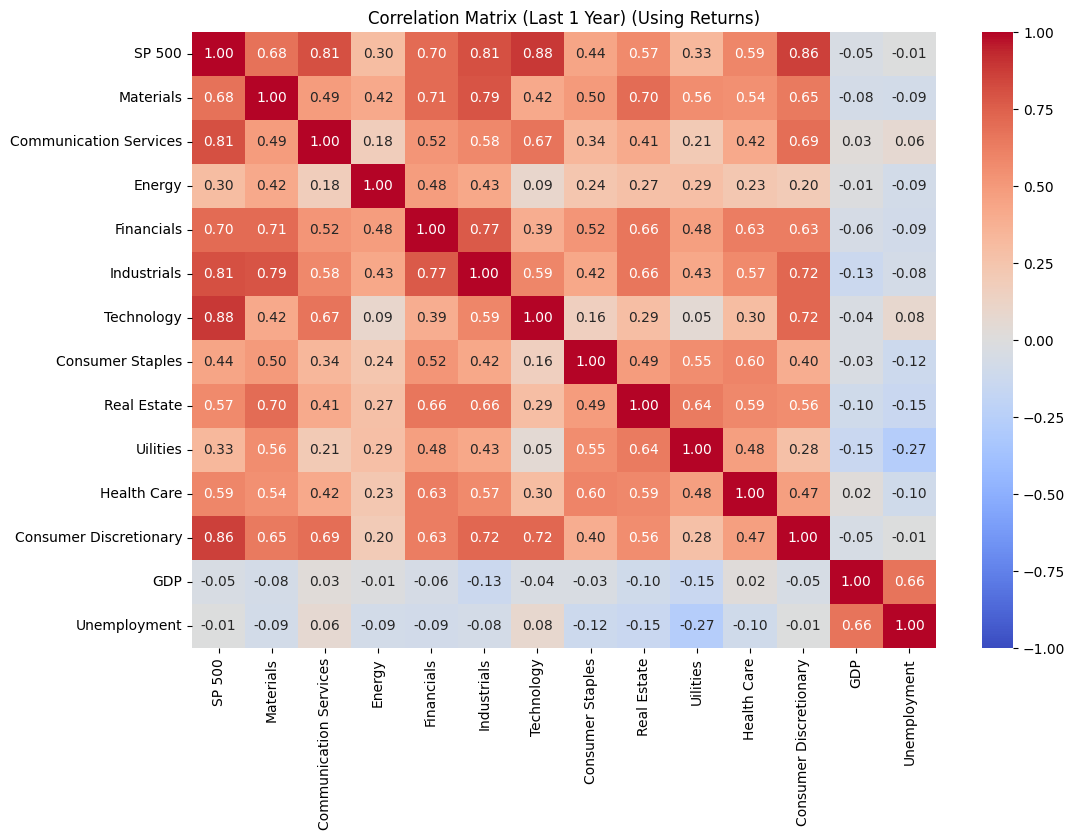

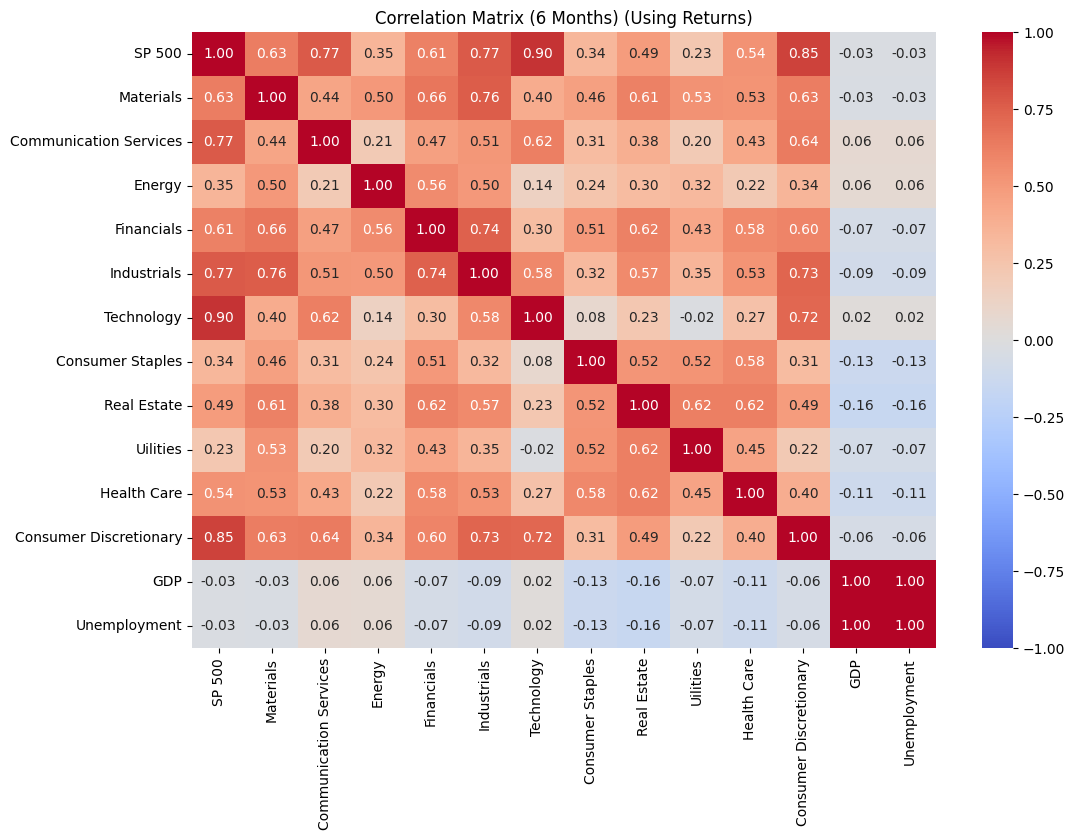

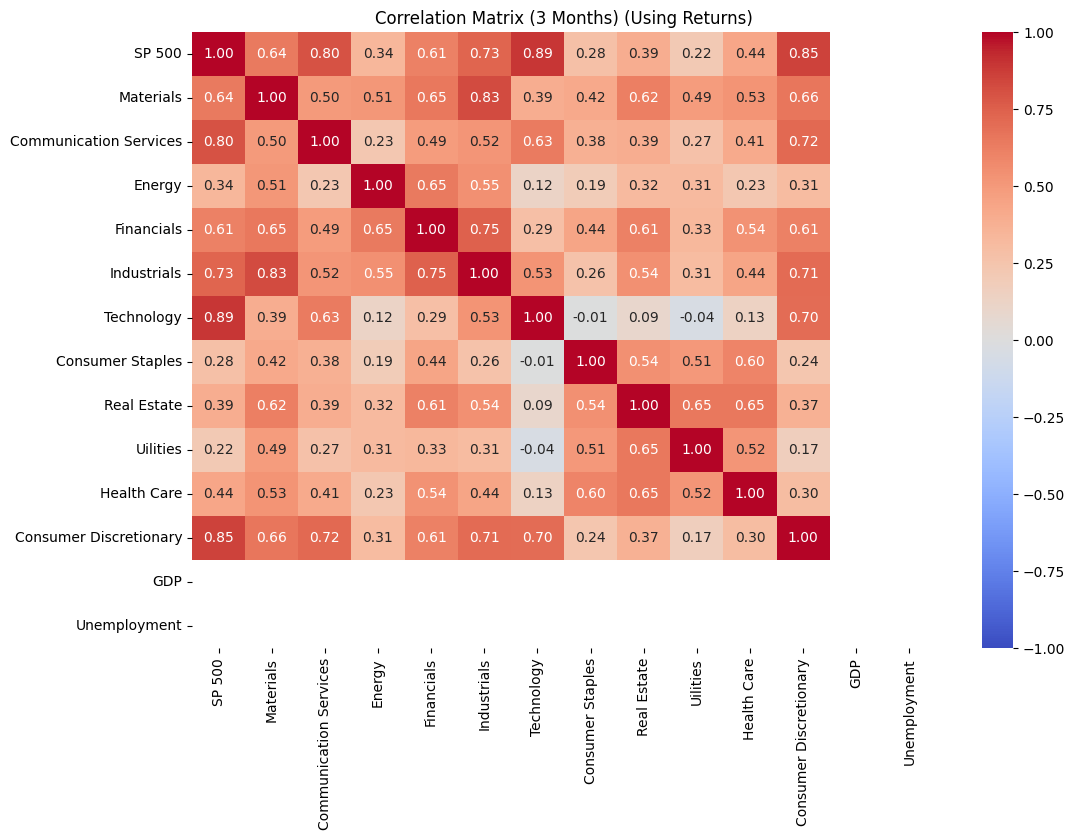

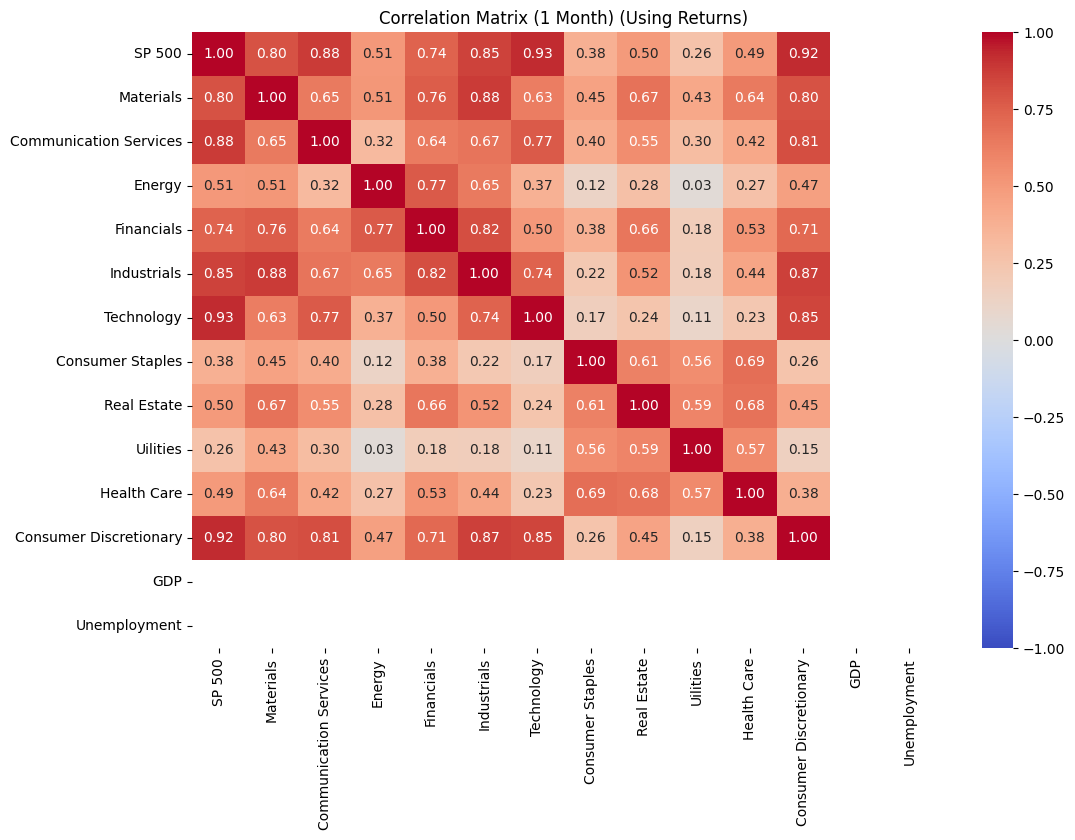

In [ ]:
def sector_sp500_correlation_analysis(data, use_returns=True):
    """
    Performs correlation analysis between the S&P 500, all sectors, and/or US economic data using either daily prices or daily returns,
    over multiple time periods.

    Parameters:
    - data: The DataFrame containing the S&P 500, sector data, and/or US economic data.
    - use_returns: If True, use daily returns for correlation for SP500 and sectors. If False, use daily closing prices for SP500, sectors, and US economic data.

    Returns:
    - correlations_dict: A dictionary containing correlation matrices for each period.
    """

    # Define the period options for correlation analysis
    periods = {
        'all_time': None,
        'last_3_years': pd.DateOffset(years=3),
        'last_2_years': pd.DateOffset(years=2),
        'last_1_year': pd.DateOffset(years=1),
        '6_months': pd.DateOffset(months=6),
        '3_months': pd.DateOffset(months=3),
        '1_month': pd.DateOffset(months=1)
    }

    # Create a dictionary to store the correlation matrices for each period
    correlations_dict = {}

    # Loop through each period option
    for period, offset in periods.items():
        # Filter the data based on the selected period
        end_date = data.index.max()  # Get the last date in the dataset
        start_date = end_date - offset if offset is not None else data.index.min()
        filtered_data = data.loc[start_date:end_date]

        sp500_column = 'SP 500'  # Replace with the actual column name for S&P 500

        # Calculate daily returns if required
        if use_returns:
            # Filter out non-sector columns and calculate returns
            unused_cols = ['Election', 'President', 'Party', ]
            used_cols = [col for col in filtered_data.columns if col not in unused_cols]
            filtered_data = filtered_data[used_cols].pct_change().dropna()
        else:
            # Filter out non-sector columns
            unused_cols = ['Election', 'President', 'Party','GDP', 'Unemployment']
            used_cols = [col for col in filtered_data.columns if col not in unused_cols]
            filtered_data = filtered_data[used_cols]

        # Calculate the correlation matrix for the filtered data
        correlation_matrix = filtered_data.corr()

        # Store the correlation matrix in the dictionary
        correlations_dict[period] = correlation_matrix

        # Plot the correlation matrix as a heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(f'Correlation Matrix ({period.replace("_", " ").title()})' +
                  (' (Using Returns)' if use_returns else ' (Using Prices)'))
        plt.show()

    return correlations_dict


correlations_dict = sector_sp500_correlation_analysis(raw, use_returns=True)

# To print all correlation matrix
# for period, corr_matrix in correlations_dict.items():
#     print(f'\nCorrelation Matrix for {period.replace("_", " ").title()}:\n', corr_matrix)


Generally, Energy sector has lowest correlation among the sectors across all time frame.

However, measurement of correlation at lower time frames (1-3 months), Energy, Technology, Consumer Staples and Utilities has the lowerst correlation.

### Dynamic Correlation Charts

In [ ]:
def sector_sp500_correlation_analysis(data, use_returns=True):
    """
    Performs correlation analysis between the S&P 500, all sectors, and/or US economic data using either daily prices or daily returns,
    over multiple time periods.

    Parameters:
    - data: The DataFrame containing the S&P 500, sector data, and/or US economic data.
    - use_returns: If True, use daily returns for correlation for SP500 and sectors. If False, use daily closing prices for SP500, sectors, and US economic data.

    Returns:
    - fig: A Plotly Figure object containing heatmaps for correlation matrices.
    """

    # Define the period options for correlation analysis
    periods = {
        'All Time': None,
        'Last 3 Years': pd.DateOffset(years=3),
        'Last 2 Years': pd.DateOffset(years=2),
        'Last 1 Year': pd.DateOffset(years=1),
        '6 Months': pd.DateOffset(months=6),
        '3 Months': pd.DateOffset(months=3),
        '1 Month': pd.DateOffset(months=1)
    }

    # Create a list to store heatmaps for each period
    heatmaps = []
    buttons = []

    # Loop through each period option
    for i, (period, offset) in enumerate(periods.items()):
        # Filter the data based on the selected period
        end_date = data.index.max()  # Get the last date in the dataset
        start_date = end_date - offset if offset is not None else data.index.min()
        filtered_data = data.loc[start_date:end_date]

        # Calculate daily returns if required
        if use_returns:
            # Filter out non-sector columns and calculate returns
            unused_cols = ['Election', 'President', 'Party']
            used_cols = [col for col in filtered_data.columns if col not in unused_cols]
            filtered_data = filtered_data[used_cols].pct_change().dropna()
        else:
            # Filter out non-sector columns
            unused_cols = ['Election', 'President', 'Party','GDP', 'Unemployment']
            used_cols = [col for col in filtered_data.columns if col not in unused_cols]
            filtered_data = filtered_data[used_cols]

        # Calculate the correlation matrix for the filtered data
        correlation_matrix = filtered_data.corr()

        # Create a heatmap for the correlation matrix using Plotly
        heatmap = go.Heatmap(
            z=correlation_matrix.values,
            x=correlation_matrix.columns,
            y=correlation_matrix.index,
            colorscale='amp',
            zmin=-1,
            zmax=1,
            text=np.round(correlation_matrix.values, 2),
            hoverinfo='text',
            visible=True if i == 0 else False  # Show only the first heatmap initially
        )
        heatmaps.append(heatmap)

        # Add button to select this period
        buttons.append(
            dict(
                label=period,
                method="update",
                args=[{"visible": [index == i for index in range(len(periods))]},
                      {"title": f'Correlation Matrix ({period})'}]
            )
        )

    # Create the figure and add the heatmaps
    fig = go.Figure(data=heatmaps)

    # Add dropdown menu for period selection
    fig.update_layout(
        updatemenus=[{
            "buttons": buttons,
            "direction": "down",
            "showactive": True,
        }],
        title="Correlation Matrix (All Time)",
        xaxis_title="Sectors",
        yaxis_title="Sectors",
        autosize=True,
        width=1100,
        height=800,
    )

    return fig

fig = sector_sp500_correlation_analysis(raw, use_returns=True)
fig.show()


## Sectors' Return Analysis

### Box Plot

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Create a function for the interactive box plot
def filter_data_and_box_plot(data, selected_years=None, selected_sectors=None, use_returns=True):
    """
    Filters the data based on the provided years and sectors, and then plots the filtered data.

    Parameters:
    - data: The DataFrame containing the data.
    - selected_years: A list of years to filter by (e.g., [2020, 2021]). If None, no year filtering is applied.
    - selected_sectors: A list of sectors to filter by (e.g., ['SP 500', 'Technology']). If None, all sectors are plotted.

    Returns:
    - fig: A Plotly Figure object.
    """

    # Filter the data
    # If no years are specified, select all years
    if selected_years is not None:
        filtered_data = data[data.index.year.isin(selected_years)]  # filter selected years
    else:
        filtered_data = data

    # If no sectors are specified, select all sectors
    if selected_sectors is not None:
        filtered_data = filtered_data[selected_sectors]
    else:
        # Adjust this to exclude non-sector columns
        sectors = list(data.columns)[:-5]
        filtered_data = filtered_data[sectors]

    # Calculate daily returns if required
    if use_returns:
        filtered_data = filtered_data.pct_change(fill_method=None).dropna()
    # else:
    #     # Filter out non-sector columns
    #     unused_cols = ['Election', 'President', 'Party']
    #     used_cols = [col for col in filtered_data.columns if col not in unused_cols]
    #     filtered_data = filtered_data[used_cols]

    # Melt the dataframe for box plot
    melted_data = pd.melt(filtered_data, var_name='Sector', value_name='Value')

    # Create the figure for boxplot
    fig = go.Figure()

    # Add a box plot trace for each selected sector
    for sector in melted_data['Sector'].unique():
        sector_data = melted_data[melted_data['Sector'] == sector]
        fig.add_trace(go.Box(y=sector_data['Value'], name=sector))

    # Update layout with dropdowns
    fig.update_layout(
        title="Filtered Data Box Plot",
        xaxis_title="Sectors",
        yaxis_title="Daily Returns (%)",
        legend_title="Sector",
        autosize=True,
        width=1100,
        height=800,
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label='All Sectors',
                         method='update',
                         args=[{'visible': [True] * len(data.columns)},
                               {'title': 'All Sectors'}])
                ] + [
                    dict(label=sector,
                         method='update',
                         args=[{'visible': [col == sector for col in data.columns]},
                               {'title': f'{sector}'}])
                    for sector in data.columns
                ])
            )
        ]
    )

    return fig


fig = filter_data_and_box_plot(raw, use_returns=True)
fig.show()


Energy has the widest IQR and most outliers, suggesting most volatile sector.

While consumer staples has the smallest IQR and least outlier, suggesting least volatile sector among all.

### Histogram

In [ ]:
# Function to create histogram
def filter_data_and_histogram(data, selected_years=None, selected_sectors=None):
    """
    Filters the data based on the provided years and sectors, and then plots the filtered data.

    Parameters:
    - data: The DataFrame containing the data.
    - selected_years: A list of years to filter by (e.g., [2020, 2021]). If None, no year filtering is applied.
    - selected_sectors: A list of sectors to filter by (e.g., ['SP 500', 'Technology']). If None, all sectors are plotted.

    Returns:
    - fig: A Plotly Figure object.
    """
    # Filter the data
    filtered_data = filter_data(data, selected_years, selected_sectors)

    # Filter out non-sector columns and calculate returns
    unused_cols = ['Election', 'President', 'Party', 'GDP', 'UNRATE']
    used_cols = [col for col in filtered_data.columns if col not in unused_cols]
    filtered_data = filtered_data[used_cols].pct_change().dropna()

    # Melt the dataframe for histogram
    melted_data = pd.melt(filtered_data, var_name='Sector', value_name='Value')

    # Create the figure for histogram
    fig = go.Figure()

    # Add a histogram trace for each selected sector
    for sector in melted_data['Sector'].unique():
        sector_data = melted_data[melted_data['Sector'] == sector]
        fig.add_trace(go.Histogram(x=sector_data['Value'], name=sector))

    # Update layout with appropriate labels and settings
    fig.update_layout(
        title="Filtered Data Histogram",
        xaxis_title="Value",
        yaxis_title="Count",
        legend_title="Sector",
        autosize=True,
        width=1100,
        height=800,
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label='All Sectors',
                         method='update',
                         args=[{'visible': [True] * len(melted_data['Sector'].unique())},
                               {'title': 'All Sectors'}])
                ] + [
                    dict(label=sector,
                         method='update',
                         args=[{'visible': [sector == s for s in melted_data['Sector'].unique()]},
                               {'title': f'{sector}'}])
                    for sector in melted_data['Sector'].unique()
                ])
            )
        ]
    )

    return fig



fig = filter_data_and_histogram(raw)
fig.show()



All sectors follows a normal distribution

# US Market Performance over US Presidential Election Period

## Function library

In [ ]:
def plot_US_sectors_by_election(data, selected_sectors):
  # Plot the data
  fig, ax = plt.subplots(figsize=(12, 8))

  ax.plot(data['Date'], data[selected_sectors], label=selected_sectors, linewidth=1.5)

  for i in range(1, len(data)):
      if data['Election'].iloc[i] == 'Non-Election':
          ax.axvspan(data['Date'].iloc[i-1], data['Date'].iloc[i], color='white', alpha=0.3)
      elif data['Election'].iloc[i] == 'Pre-Election':
          ax.axvspan(data['Date'].iloc[i-1], data['Date'].iloc[i], color='yellow', alpha=0.3)
      elif data['Election'].iloc[i] == 'During-Election':
          ax.axvspan(data['Date'].iloc[i-1], data['Date'].iloc[i], color='red', alpha=0.3)
      elif data['Election'].iloc[i] == 'Post-Election':
          ax.axvspan(data['Date'].iloc[i-1], data['Date'].iloc[i], color='green', alpha=0.3)

  # Set titles and labels
  ax.set_title('US Sector by Election Period')
  ax.set_xlabel('Year')
  ax.set_ylabel('Sectors')

  ax.legend(loc='best')

  # Display the plot
  plt.show()


def plot_US_sectors_by_Party(data, selected_sectors):
  # Plot the data
  fig, ax = plt.subplots(figsize=(12, 8))

  ax.plot(data['Date'], data[selected_sectors], label=selected_sectors, linewidth=1.5)

  for i in range(1, len(data)):
      if data['Party'].iloc[i] == 'Republican':
          ax.axvspan(data['Date'].iloc[i-1], data['Date'].iloc[i], color='red', alpha=0.8)
      elif data['Party'].iloc[i] == 'Democratic':
          ax.axvspan(data['Date'].iloc[i-1], data['Date'].iloc[i], color='blue', alpha=0.8)

  # Set titles and labels
  ax.set_title('US Sector by Party')
  ax.set_xlabel('Year')
  ax.set_ylabel('Sectors')

  ax.legend(loc='best')

  # Display the plot
  plt.show()


## Select Period & Sectors

In [ ]:
# Selected Period
selected_period = [i for i in range(2016,2025)]

# Selected Columns
selected_cols = list(raw.columns[:-2]) # exclude GDP & unemployment
selected_sectors = list(raw.columns[:-5]) # exclude Election, President, Party, GDP & unemployment

# Filter the data
df_filtered = filter_data(raw, selected_period, selected_cols)
df_filtered.reset_index(inplace=True)
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered.head()

,Date,SP 500,Materials,Communication Services,Energy,Financials,Industrials,Technology,Consumer Staples,Real Estate,Uilities,Health Care,Consumer Discretionary,Election,President,Party
0,2016-01-04,173.483551,36.036118,NaN,42.208134,16.104382,44.768238,38.133724,39.717812,22.739388,32.787575,61.440022,69.853935,Non-Election,Barack Obama,Democratic
1,2016-01-05,173.776978,36.019245,NaN,42.369133,16.166399,44.888077,38.034496,39.972771,23.428438,33.022903,61.735359,69.763008,Non-Election,Barack Obama,Democratic
2,2016-01-06,171.584869,35.074924,NaN,40.738197,15.918326,44.194733,37.565376,39.837322,23.202232,32.962173,61.231548,69.081001,Non-Election,Barack Obama,Democratic
3,2016-01-07,167.468292,34.122185,NaN,39.744251,15.470404,42.996342,36.455734,39.359276,22.776714,32.742020,59.989380,67.662498,Non-Election,Barack Obama,Democratic
4,2016-01-08,165.630066,33.776470,NaN,39.233265,15.229214,42.559784,36.167042,39.056515,22.478102,32.726833,59.085968,66.935043,Non-Election,Barack Obama,Democratic


## Plot US Market Price by Election Period


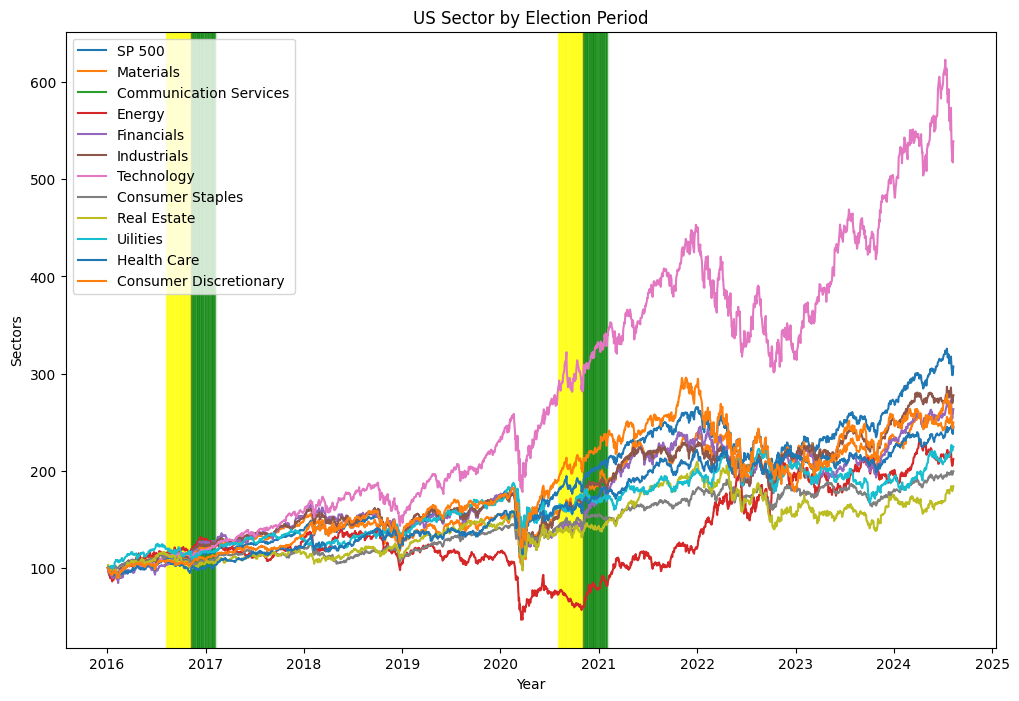

In [ ]:
# Normalize data
df_normalized = df_filtered.copy()
df_normalized[selected_sectors] = df_normalized[selected_sectors].div(df_normalized[selected_sectors].iloc[0]).mul(100)

# Plot the data
plot_US_sectors_by_election(df_normalized, selected_sectors)

## Plot US Market Performance by Election Period

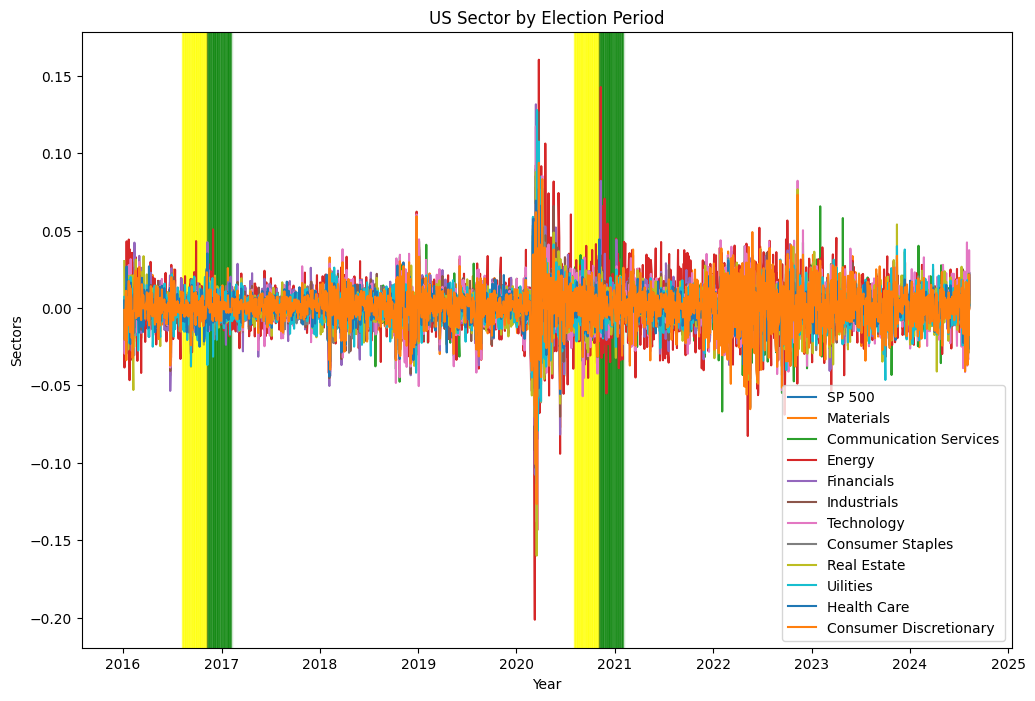

In [ ]:
# Calculate daily returns
df_ret = df_filtered.copy()
df_ret[selected_sectors] = df_ret[selected_sectors].pct_change()

# Plot the data
plot_US_sectors_by_election(df_ret, selected_sectors)

In [ ]:
# Selected Period
selected_period = [2020,2021]

# Selected Columns
selected_cols = list(raw.columns[:-2]) # exclude GDP & unemployment
selected_sectors = list(raw.columns[:-5]) # exclude Election, President, Party, GDP & unemployment

# Filter the data
df_investigate = filter_data(raw, selected_period, selected_cols)
df_investigate.reset_index(inplace=True)
df_investigate['Date'] = pd.to_datetime(df_investigate['Date'])
df_investigate.head()

# Calculate daily returns
df_investigate[selected_sectors] = df_investigate[selected_sectors].pct_change()

# Create the interactive line chart using Plotly
fig = px.line(df_investigate, x='Date', y=selected_sectors, title='S&P 500 Price from 2020 to 2024')

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Statistical Analysis: one-way ANOVA

Objective: To see if SP500 performed differently pre-, during- and post- US presidential election.

Pre and Post election is 3 months before and after.

During election dates are defined in Data 2 section.

H0: SP500 mean returns are the same pre-,during, and post-election.

H1: At least one period mean returns is different.

In [51]:
# Compute daily returns and filter out election period
data = raw.copy()
data = data.loc['2020':]
data[sectors] = data[sectors].pct_change()
pre_election = data[data.Election=='Pre-Election'].drop(columns=['Election', 'President', 'Party','GDP','Unemployment'])
during_election = data[data.Election=='During-Election'].drop(columns=['Election', 'President', 'Party','GDP','Unemployment'])
post_election = data[data.Election=='Post-Election'].drop(columns=['Election', 'President', 'Party','GDP','Unemployment'])

In [54]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pre_election['SP 500'], during_election['SP 500'], post_election['SP 500'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1.6766120095322845
p-value: 0.19118417634760002


In [55]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pre_election['Energy'], during_election['Energy'], post_election['Energy'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1.7803122542450363
p-value: 0.17283332041922553


The test output yields an F-statistic of 1.7803 and a p-value of 0.1728, indicating that there is no significant difference between the means of each period for Energy.

## US Market Price by Party

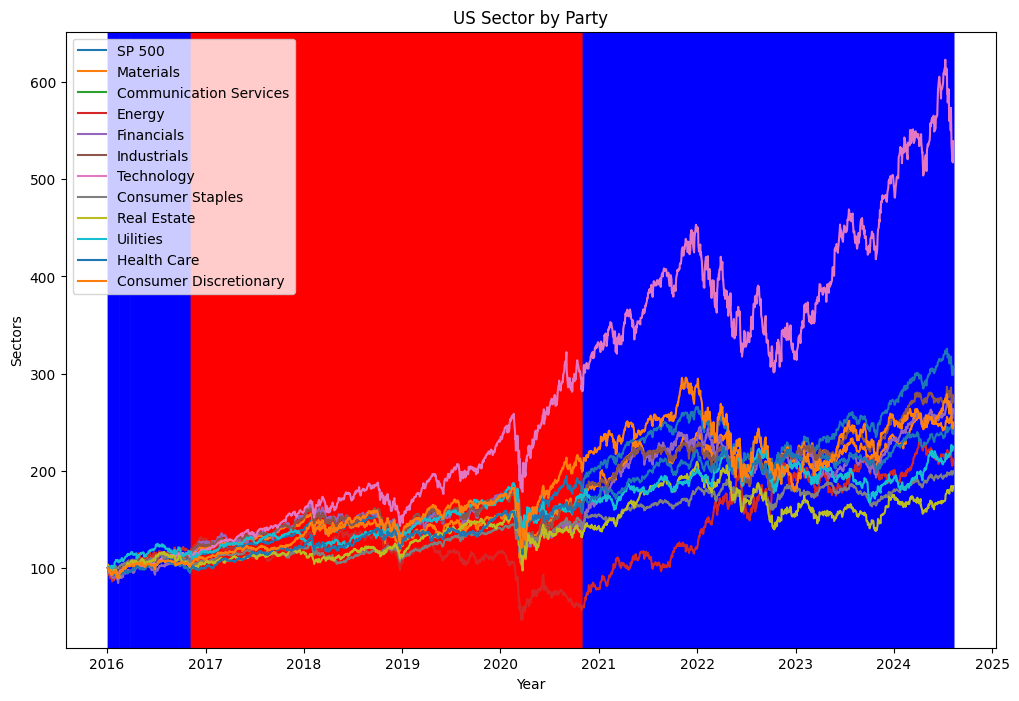

In [ ]:
# Plot the data
plot_US_sectors_by_Party(df_normalized, selected_sectors)

## US Market Performance by Party

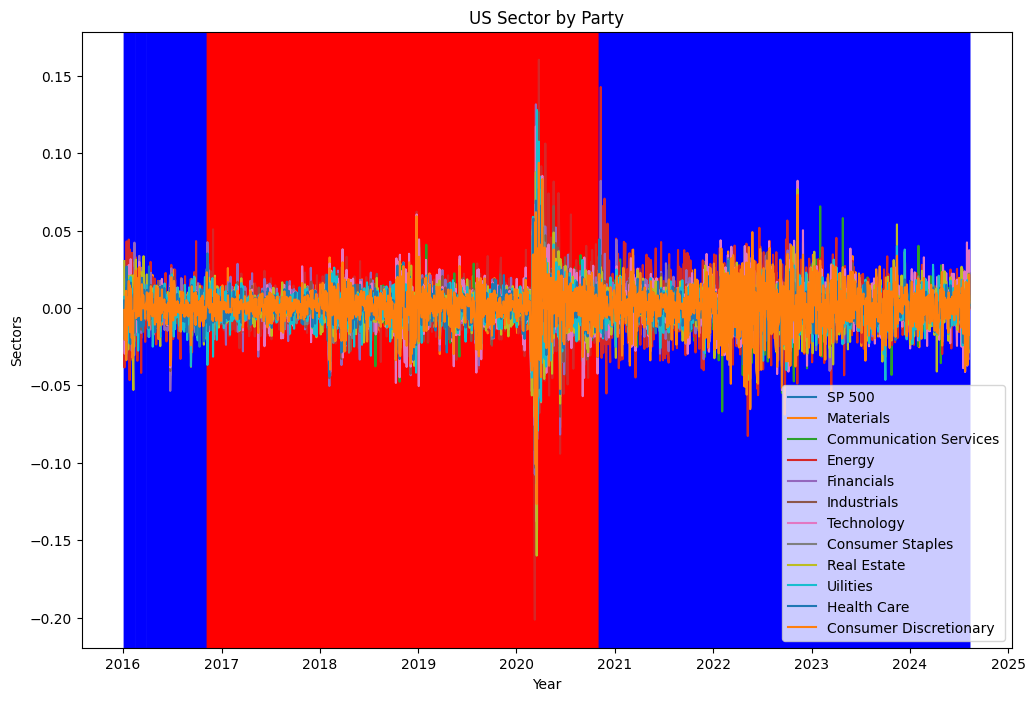

In [ ]:
# Plot the data
plot_US_sectors_by_Party(df_ret, selected_sectors)